In [1]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Distribución Normal

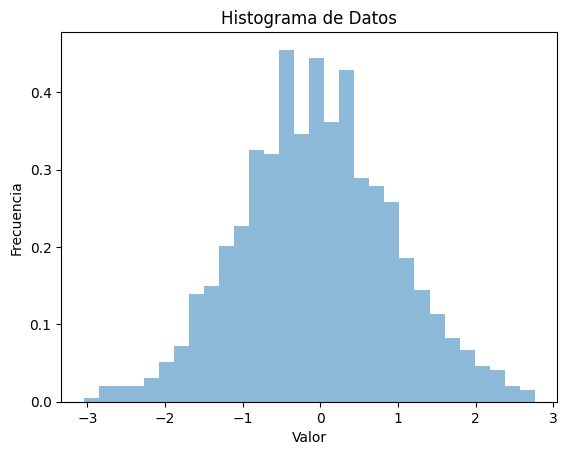

In [2]:
# Generar datos aleatorios que sigan una distribución normal
np.random.seed(0)

# generamos un array con media = 0, desviación estándar = 1, 1000 muestras
data = np.random.normal(0, 1, 1000) 

# creamos un DataFrame con los datos normales creados previamente
df_normal = pd.DataFrame({'Datos': data})

# Crear un histograma para visualizar la distribución
plt.hist(df_normal['Datos'], 
         bins=30, 
         density=True, 
         alpha=0.5)

# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Valor')

# cambiamos el nombre del eje y
plt.ylabel('Frecuencia');

# como podemos ver los datos generados tienen forma de campana de Gauss, por lo que podemos decir que es una distribución normal. 

Otra forma de identificar si una variable sigue una distribución normal o no podemos usar el test de Shapiro o el de Kolmogorov-Smirnov. 

**Interpretación de los resultados**


- *Test de Shapiro-Wilk:*

     - **Hipótesis Nula (H0):** La hipótesis nula asume que los datos provienen de una distribución normal.

     - **Hipótesis Alternativa (H1):** La hipótesis alternativa afirma que los datos no provienen de una distribución normal.

     - Interpretación: 

         - Si el p-value > 0.05, no se rechaza la hipótesis nula (H0). Esto significa que no hay suficiente evidencia para concluir que los datos no siguen una distribución normal. En otras palabras, los datos podrían considerarse aproximadamente normales.

         - Si el p-value < 0.05, se rechaza la hipótesis nula. Esto indica que hay evidencia suficiente para concluir que los datos no siguen una distribución normal y que hay desviaciones significativas de la normalidad.

- *Test de Kolmogorov-Smirnov:*

     - **Hipótesis Nula (H0):** La hipótesis nula asume que los datos siguen la distribución teórica (o que las dos muestras provienen de la misma población).

     - **Hipótesis Alternativa (H1):** La hipótesis alternativa afirma que los datos no siguen la distribución teórica (o que las dos muestras no provienen de la misma población).

     - Interpretación:

          - Si el p-valor > 0.05, no se rechaza la hipótesis nula (H0). Esto sugiere que los datos son consistentes con la distribución teórica o que las dos muestras provienen de la misma población.

          - Si el p-valor < 0.05,  se rechaza la hipótesis nula. Esto indica que hay evidencia suficiente para concluir que los datos no siguen la distribución teórica (en el caso de una prueba de bondad de ajuste) o que las dos muestras no provienen de la misma población (en el caso de una prueba de comparación de muestras).

En este notebook, veremos cómo realizar el test de Shapiro y el test de Kolmogorov-Smirnov en Python utilizando la biblioteca `scipy.stats`.

In [4]:
df_normal.head()

,Datos
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558


In [5]:
# Realizar una prueba de normalidad (usando la prueba de Shapiro-Wilk)
p_value = shapiro(df_normal['Datos']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos se ajustan a una distribución normal (p-value = 0.5912267898687746 )


In [6]:
# Realizar una prueba de normalidad (usando la prueba de Kolmogorov)
p_value = kstest(df_normal['Datos'], "norm").pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos se ajustan a una distribución normal (p-value = 0.11930823166569182 )
